In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#load data
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

print(train_data.head())
print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [3]:
#check missing data
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [4]:
#fill data
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

print(train_data.head())
print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [5]:
#convert text/category into number
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'Q': 1, 'C': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'Q': 1, 'C': 2})

print(train_data.head())
print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         0  
1          PC 17599  71.2833   C85         2  
2  STON/O2. 3101282   7.9250   NaN         0  
3            113803  53.1000  C123         0  
4            373450   8.0500   NaN         0  
   PassengerId

In [6]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [7]:
#delete data
train_data = train_data.drop(columns='Cabin')
test_data = test_data.drop(columns='Cabin')

print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Nam

In [8]:
#create new features
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

train_data['IsAlone'] = (train_data['FamilySize'] == 1)
test_data['IsAlone'] = (test_data['FamilySize'] == 1)

print(train_data.head())
print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  FamilySize  IsAlone  
0         A/5 21171   7.2500         0           2    False  
1          PC 17599  71.2833         2           2    False  
2  STON/O2. 3101282   7.9250         0           1     True  
3            113803  53.1000         0          

In [9]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

print(train_data['Title'].value_counts())
print(test_data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [10]:
other_titles = ['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don','Jonkheer','Dona']

train_data['Title'] = train_data['Title'].replace(other_titles, 'Other_titles')
test_data['Title'] = test_data['Title'].replace(other_titles, 'Other_titles')

train_data['Title'] = train_data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
test_data['Title'] = test_data['Title'].replace({'Ms': 'Miss'})

train_data['Title'] = train_data['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other_titles': 4})
test_data['Title'] = test_data['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other_titles': 4})

print(train_data['Title'].value_counts())
print(test_data['Title'].value_counts())

Title
0    517
1    185
2    126
3     40
4     23
Name: count, dtype: int64
Title
0    240
1     79
2     72
3     21
4      6
Name: count, dtype: int64


In [11]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  FamilySize  IsAlone  Title  
0         A/5 21171   7.2500         0           2    False      0  
1          PC 17599  71.2833         2           2    False      2  
2  STON/O2. 3101282   7.9250         0           1     True      1  
3            113803 

In [12]:
#create train set and test set
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']

x_train = train_data[features]
y_train = train_data['Survived']
x_test = test_data[features]

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

x_train_t, x_valid, y_train_t, y_valid = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

In [14]:
#model1
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train_t, y_train_t)

predictions_lr = logistic_regression.predict(x_valid)
print(accuracy_score(y_valid, predictions_lr))

0.7988826815642458


In [15]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [16]:
logistic_clf = LogisticRegression(max_iter=1000, random_state=42)

In [17]:
#find better parameters
grid_search_lr = GridSearchCV(
    estimator=logistic_clf,
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_lr.fit(x_train_t, y_train_t)

print("Best Parameters:", grid_search_lr.best_params_)
print("Best CV accuracy:", grid_search_lr.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV accuracy: 0.806136117403723


In [18]:
# test accuracy
best_logistic_clf = grid_search_lr.best_estimator_
predictions_lr_2 = best_logistic_clf.predict(x_valid)
print("x_valid accuracy:", accuracy_score(y_valid, predictions_lr_2))

x_valid accuracy: 0.7988826815642458


In [19]:
#model2
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(x_train_t, y_train_t)

predictions_rf = randomforest.predict(x_valid)
print(accuracy_score(y_valid, predictions_rf))

0.8156424581005587


In [20]:
randomforest_clf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [21]:
grid_search_rf = GridSearchCV(
    estimator=randomforest_clf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_rf.fit(x_train_t, y_train_t)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best CV accuracy:", grid_search_rf.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV accuracy: 0.8341967891263666


In [22]:
best_randomforest = grid_search_rf.best_estimator_
predictions_rf_2 = best_randomforest.predict(x_valid)
print("x_valid accuracy:", accuracy_score(y_valid, predictions_rf_2))

x_valid accuracy: 0.7988826815642458


In [23]:
#model3
from sklearn.ensemble import GradientBoostingClassifier

gradientboosting = GradientBoostingClassifier(random_state=42)
gradientboosting.fit(x_train_t, y_train_t)

predictions_gb = gradientboosting.predict(x_valid)
print(accuracy_score(y_valid, predictions_gb))

0.8044692737430168


In [24]:
gradientboosting_clf = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [25]:
grid_search_gb = GridSearchCV(
    estimator=gradientboosting_clf,
    param_grid=param_grid_gb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_gb.fit(x_train_t, y_train_t)

print("Best Parameters:", grid_search_gb.best_params_)
print("Best CV accuracy:", grid_search_gb.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV accuracy: 0.8328474342558849


In [26]:
best_gradientboosting = grid_search_gb.best_estimator_
predictions_gb_2 = best_gradientboosting.predict(x_valid)
print("x_valid accuracy:", accuracy_score(y_valid, predictions_gb_2))

x_valid accuracy: 0.8379888268156425


In [27]:
#model4
from xgboost import XGBClassifier

XGB = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

XGB.fit(x_train_t, y_train_t)

predictions_XGB = gradientboosting.predict(x_valid)
print(accuracy_score(y_valid, predictions_XGB))

0.8044692737430168


In [28]:
XGB_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

param_grid_XGB = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0]
}

In [29]:
grid_search_XGB = GridSearchCV(
    estimator=XGB_clf,
    param_grid=param_grid_XGB,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

grid_search_XGB.fit(x_train_t, y_train_t)

print("Best Parameters:", grid_search_XGB.best_params_)
print("Best CV accuracy:", grid_search_XGB.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
Best CV accuracy: 0.8468925440756425


In [30]:
best_XGB = grid_search_XGB.best_estimator_
predictions_XGB_2 = best_XGB.predict(x_valid)
print("x_valid accuracy:", accuracy_score(y_valid, predictions_XGB_2))

x_valid accuracy: 0.8100558659217877


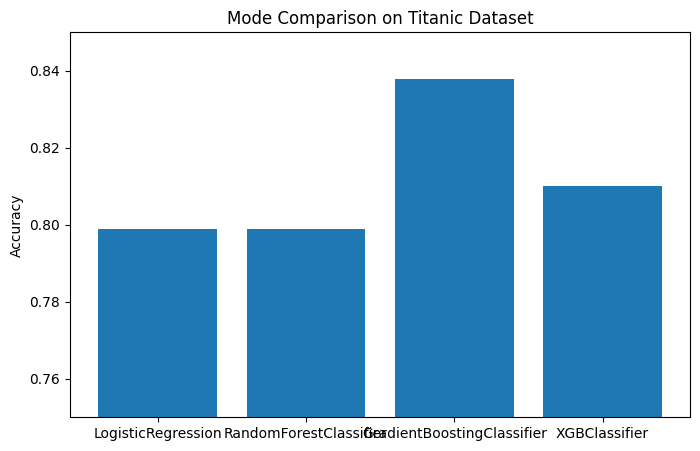

In [31]:
#compare
import matplotlib.pyplot as plt

scores = {
    "LogisticRegression": 0.7988826815642458,
    "RandomForestClassifier": 0.7988826815642458,
    "GradientBoostingClassifier": 0.8379888268156425,
    "XGBClassifier": 0.8100558659217877
}

models = list(scores.keys())
values = list(scores.values())

plt.figure(figsize=(8, 5))
plt.bar(models, values)
plt.title("Mode Comparison on Titanic Dataset")
plt.ylabel("Accuracy")
plt.ylim(0.75, 0.85)
plt.show()

In [32]:
#choose the best model and create output file
predictions_final = best_gradientboosting.predict(x_test)
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions_final})
print(output)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [33]:
output.to_csv('submission_param_multi.csv', index=False)